### 

target_imgs # 10 

target_img_A <= (0,0)
target_img_B <= (1,1)

field_A = torch.exp(1jphase_A)
field_B = torch.exp(1jphase_B)

inter_phase = phase_A * x + phase_B * (1-x)

field_inter = torch.exp(1j*inter_phase)

tt.simulate(field_inter, 20e-3)

### Code

In [1]:
# import

import torch.nn as nn
import torch
import sys, os
sys.path.append(os.pardir)
from torchOptics import optics as tt
from torchOptics import models as tm
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [2]:
meta = {'wl':(638e-9, 515e-9, 450e-9), 'dx': (6.3e-6, 6.3e-6)}

In [5]:
# array1

size = 512  #배열 크기
sigma = 10  #표준편차
phase1 = np.zeros((size, size), dtype=np.float64)
amplitude = 1

#gaussian 추가
def add_gaussian(x1, y1, sigma, amplitude=amplitude):
    y, x = np.indices((size, size))
    x1 = float(x1)
    y1 = float(y1)
    gaussian = amplitude * np.exp(-((x-x1)**2+(y-y1)**2)/(2*sigma**2))
    return gaussian

centers = [(200, 200), (200, 350), (350, 350), (350, 200)]
for center in centers:
    phase1 += add_gaussian(center[0], center[1], sigma)

phase1 = tt.Tensor(phase1, meta=meta)

In [4]:
# array2
p=10
phase2 = np.zeros((size, size), dtype=np.float64)
centers = [(200+p, 200), (200+p, 350), (350+p, 350), (350+p, 200)]
for center in centers:
    phase2 += add_gaussian(center[0], center[1], sigma)

phase2 = tt.Tensor(phase2, meta=meta)

In [8]:
SLM_phase1 = phase1
timg = SLM_phase1
phase = torch.ones_like(timg)
phase.requires_grad = True
optimizer = torch.optim.Adam([phase], lr=0.001)
criterion = torch.nn.MSELoss()
pbar = tqdm(range(10000))
for i in pbar :
    optimizer.zero_grad()
    field1 = torch.exp(1j*phase)
    sim = tt.simulate(field1, 20e-3).abs()**2
    loss = criterion(sim, timg)
    loss.backward()
    optimizer.step()
    pbar.set_description('{:.4f}'.format(loss.item()))

0.0002: 100%|██████████| 10000/10000 [01:28<00:00, 112.49it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


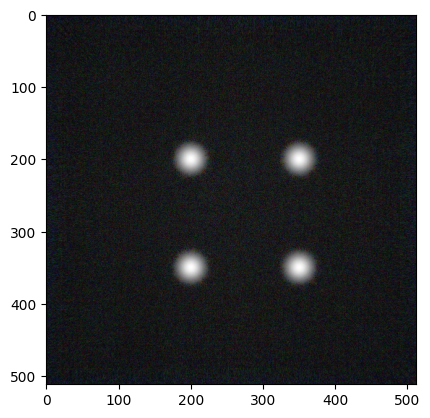

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [12]:
tt.simulate(field1, 20e-3)

In [9]:
SLM_phase2 = phase2
timg = SLM_phase2
phase_ = torch.ones_like(timg)
phase_.requires_grad = True
optimizer = torch.optim.Adam([phase_], lr=0.001)
criterion = torch.nn.MSELoss()
pbar = tqdm(range(10000))
for i in pbar :
    optimizer.zero_grad()
    field2 = torch.exp(1j*phase_)
    sim = tt.simulate(field2, 20e-3).abs()**2
    loss = criterion(sim, timg)
    loss.backward()
    optimizer.step()
    pbar.set_description('{:.4f}'.format(loss.item()))

0.0002: 100%|██████████| 10000/10000 [01:29<00:00, 111.21it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


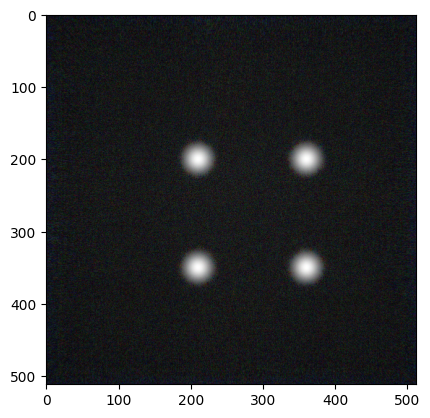

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [13]:
tt.simulate(field2, 20e-3)

In [22]:
x = 0.5
SLM_phase_inter = phase1*x + phase2*(1-x)
timg = SLM_phase_inter
phase_inter = torch.ones_like(timg)
phase_inter.requires_grad = True
optimizer = torch.optim.Adam([phase_inter], lr=0.001)
criterion = torch.nn.MSELoss()
pbar = tqdm(range(10000))
for i in pbar :
    optimizer.zero_grad()
    field3 = torch.exp(1j*phase_inter)
    sim = tt.simulate(field3, 20e-3).abs()**2
    loss = criterion(sim, timg)
    loss.backward()
    optimizer.step()
    pbar.set_description('{:.4f}'.format(loss.item()))

0.0002: 100%|██████████| 10000/10000 [01:25<00:00, 117.11it/s]


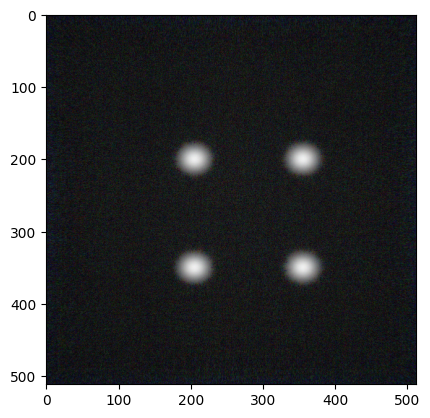

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [26]:
tt.simulate(field3, 20e-3) #field inter

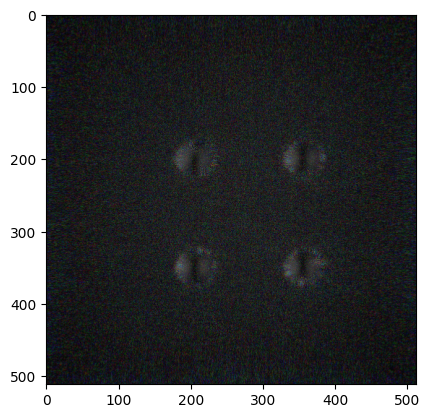

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [24]:
tt.simulate(field2-field3, 20e-3)

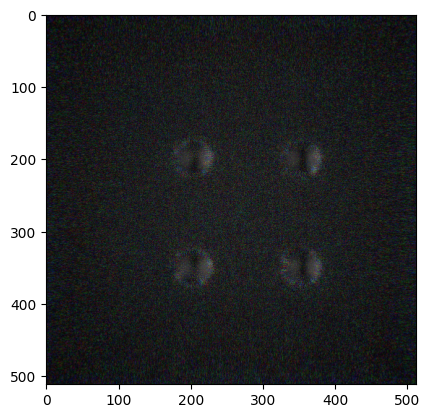

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [25]:
tt.simulate(field1-field3, 20e-3)